In [1]:
from IPython.display import Markdown, display

display(Markdown("""
# 🧭 Mission 1 — Maternal Health Analytics
### *The Data Traveler Chronicles – “The City That Ignored Its Data”*

Welcome, Data Traveler.

In this mission, you’ll analyze a **global maternal health dataset** to uncover hidden insights about maternal complications, blood pressure trends, and the impact of antenatal visits on outcomes.

This notebook will guide you through:
1. **Exploratory Data Analysis (EDA)**
2. **Predictive Modeling (Logistic Regression & Decision Tree)**
3. **Insights and Narrative Building**

By the end, you’ll produce **data-driven insights and storytelling visuals** for your LinkedIn Chronicle.

---
**Author:** Duru Chukwuma
**Project:** Data Traveler Chronicles – Mission 1
"""))



# 🧭 Mission 1 — Maternal Health Analytics  
### *The Data Traveler Chronicles – “The City That Ignored Its Data”*

Welcome, Data Traveler.

In this mission, you’ll analyze a **global maternal health dataset** to uncover hidden insights about maternal complications, blood pressure trends, and the impact of antenatal visits on outcomes.

This notebook will guide you through:
1. **Exploratory Data Analysis (EDA)**  
2. **Predictive Modeling (Logistic Regression & Decision Tree)**  
3. **Insights and Narrative Building**

By the end, you’ll produce **data-driven insights and storytelling visuals** for your LinkedIn Chronicle.

---
**Author:** Duru Chukwuma  
**Project:** Data Traveler Chronicles – Mission 1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Visualization style
plt.style.use('default')
sns.set_context('notebook')

print("✅ Libraries loaded successfully – Ready to begin analysis.")


✅ Libraries loaded successfully – Ready to begin analysis.


In [3]:
from google.colab import files
import io

print("📂 Please upload the dataset: 'maternal_health_global_1000.csv'")
uploaded = files.upload()

# Load the uploaded file
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
print(f"\n✅ Dataset '{filename}' loaded successfully. Shape: {df.shape}\n")
display(df.head())


📂 Please upload the dataset: 'maternal_health_global_1000.csv'


Saving maternal_health_global_1000.csv to maternal_health_global_1000.csv

✅ Dataset 'maternal_health_global_1000.csv' loaded successfully. Shape: (1000, 13)



,Country,Region,Age,SystolicBP,DiastolicBP,BloodSugar_mg_dL,BodyTemp_C,HeartRate_bpm,FacilityDistance_km,AntenatalVisits,RiskLevel,Complication,ReportDate
0,Brazil,South America,25,112,69,55,37.1,74,3.4,3,low,no,10/18/2023
1,Saudi Arabia,Middle East,24,104,75,98,37.2,97,2.2,7,low,no,9/26/2021
2,Philippines,Asia,26,105,79,167,36.1,89,12.3,3,medium,no,7/4/2020
3,Egypt,Africa,26,118,60,49,37.0,55,4.9,4,low,no,5/26/2024
4,Mexico,North America,23,129,61,48,36.5,74,15.0,7,low,no,2/3/2022


In [4]:
display(Markdown("## 🧮 Step 1: Initial Data Overview"))

df.info()
print("\nMissing Values Summary:")
print(df.isna().sum())
display(df.describe(include='all').T)


## 🧮 Step 1: Initial Data Overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              1000 non-null   object 
 1   Region               1000 non-null   object 
 2   Age                  1000 non-null   int64  
 3   SystolicBP           1000 non-null   int64  
 4   DiastolicBP          1000 non-null   int64  
 5   BloodSugar_mg_dL     1000 non-null   int64  
 6   BodyTemp_C           1000 non-null   float64
 7   HeartRate_bpm        1000 non-null   int64  
 8   FacilityDistance_km  1000 non-null   float64
 9   AntenatalVisits      1000 non-null   int64  
 10  RiskLevel            1000 non-null   object 
 11  Complication         1000 non-null   object 
 12  ReportDate           1000 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 101.7+ KB

Missing Values Summary:
Country                0
Region                 0
Age  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,1000,25,Nigeria,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,1000,7,Asia,276,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1000.0,NaN,NaN,NaN,27.957,5.909659,15.0,24.0,28.0,32.0,46.0
SystolicBP,1000.0,NaN,NaN,NaN,119.524,17.543865,80.0,107.0,120.0,132.0,169.0
DiastolicBP,1000.0,NaN,NaN,NaN,77.908,11.809954,50.0,70.0,78.0,86.0,115.0
BloodSugar_mg_dL,1000.0,NaN,NaN,NaN,90.365,28.286674,40.0,70.0,89.0,110.0,169.0
BodyTemp_C,1000.0,NaN,NaN,NaN,36.5758,0.493455,34.8,36.3,36.6,36.9,38.1
HeartRate_bpm,1000.0,NaN,NaN,NaN,81.638,12.645587,50.0,73.0,82.0,90.0,121.0
FacilityDistance_km,1000.0,NaN,NaN,NaN,6.3649,4.593452,0.0,2.6,5.5,9.1,25.4
AntenatalVisits,1000.0,NaN,NaN,NaN,3.946,2.032539,0.0,3.0,4.0,5.0,12.0


In [5]:
display(Markdown("## 🧼 Step 2: Data Cleaning & Feature Setup"))

# Convert date column to datetime (if available)
df['ReportDate'] = pd.to_datetime(df.get('ReportDate', None), errors='coerce')

# Extract year for potential trend analysis
df['Year'] = df['ReportDate'].dt.year

# Normalize text columns
df['RiskLevel'] = df['RiskLevel'].astype(str).str.lower()
df['Complication'] = df['Complication'].astype(str).str.lower()

# Quick preview
display(df.head())
print("\nRisk Level Distribution:\n", df['RiskLevel'].value_counts())
print("\nComplication Distribution:\n", df['Complication'].value_counts())


## 🧼 Step 2: Data Cleaning & Feature Setup

,Country,Region,Age,SystolicBP,DiastolicBP,BloodSugar_mg_dL,BodyTemp_C,HeartRate_bpm,FacilityDistance_km,AntenatalVisits,RiskLevel,Complication,ReportDate,Year
0,Brazil,South America,25,112,69,55,37.1,74,3.4,3,low,no,2023-10-18,2023
1,Saudi Arabia,Middle East,24,104,75,98,37.2,97,2.2,7,low,no,2021-09-26,2021
2,Philippines,Asia,26,105,79,167,36.1,89,12.3,3,medium,no,2020-07-04,2020
3,Egypt,Africa,26,118,60,49,37.0,55,4.9,4,low,no,2024-05-26,2024
4,Mexico,North America,23,129,61,48,36.5,74,15.0,7,low,no,2022-02-03,2022



Risk Level Distribution:
 RiskLevel
low       639
medium    305
high       56
Name: count, dtype: int64

Complication Distribution:
 Complication
no     917
yes     83
Name: count, dtype: int64


## 📊 Step 3: Exploratory Data Analysis (EDA)

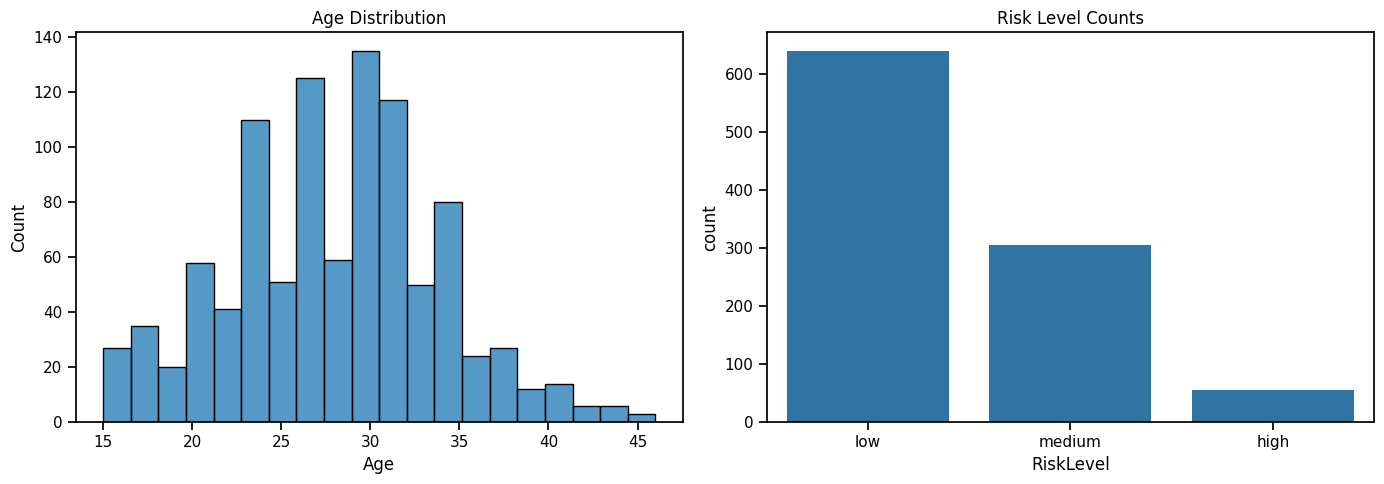

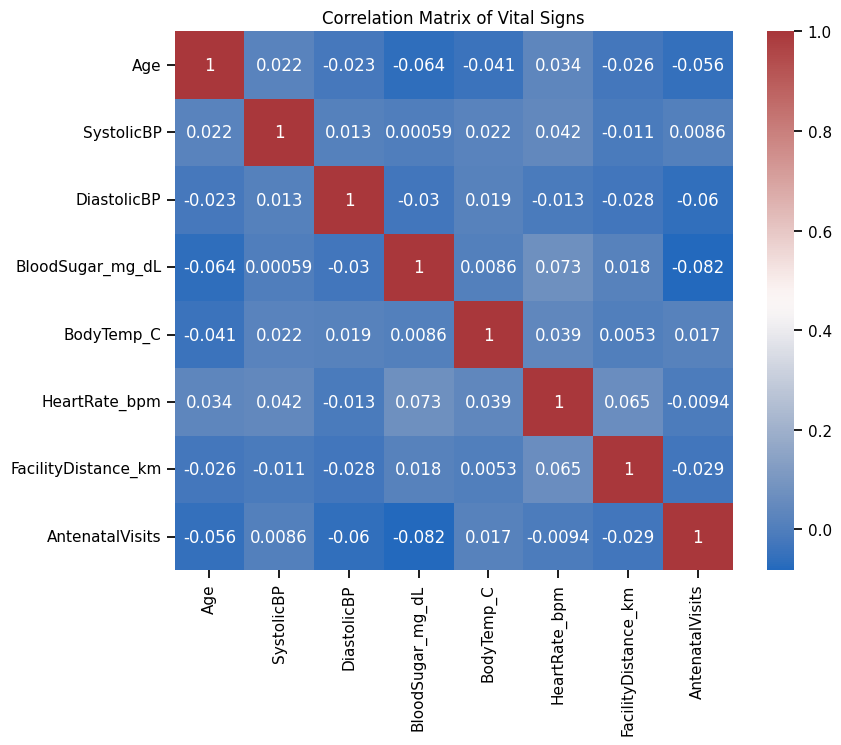

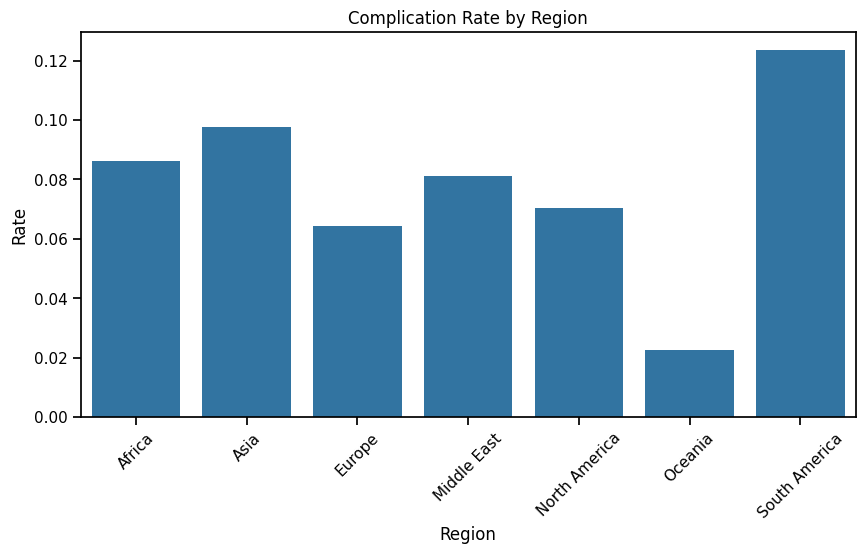

In [6]:
display(Markdown("## 📊 Step 3: Exploratory Data Analysis (EDA)"))

# 1️⃣ Age and Risk Level Distribution
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.histplot(df['Age'], bins=20, ax=axes[0])
axes[0].set_title('Age Distribution')
sns.countplot(x='RiskLevel', data=df, order=['low','medium','high'], ax=axes[1])
axes[1].set_title('Risk Level Counts')
plt.tight_layout()
plt.show()

# 2️⃣ Correlation Heatmap
num_cols = ['Age','SystolicBP','DiastolicBP','BloodSugar_mg_dL','BodyTemp_C','HeartRate_bpm','FacilityDistance_km','AntenatalVisits']
corr = df[num_cols].corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='vlag')
plt.title('Correlation Matrix of Vital Signs')
plt.show()

# 3️⃣ Complication Rate by Region
comp_rate = df.groupby('Region')['Complication'].apply(lambda x: (x=='yes').mean()).reset_index(name='Rate')
plt.figure(figsize=(10,5))
sns.barplot(x='Region', y='Rate', data=comp_rate)
plt.xticks(rotation=45)
plt.title('Complication Rate by Region')
plt.show()


In [7]:
display(Markdown("## 🤖 Step 4: Feature Engineering for Modeling"))

# Target variable
df['ComplicationFlag'] = (df['Complication'] == 'yes').astype(int)

# Features for modeling
features = ['Age','SystolicBP','DiastolicBP','BloodSugar_mg_dL','BodyTemp_C','HeartRate_bpm','FacilityDistance_km','AntenatalVisits']
X = df[features].dropna()
y = df.loc[X.index, 'ComplicationFlag']

print(f"Features shape: {X.shape}")
print("Target Distribution:\n", y.value_counts())


## 🤖 Step 4: Feature Engineering for Modeling

Features shape: (1000, 8)
Target Distribution:
 ComplicationFlag
0    917
1     83
Name: count, dtype: int64


In [8]:
display(Markdown("## ⚙️ Step 5: Train-Test Split & Scaling"))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train:", X_train.shape, "| Test:", X_test.shape)


## ⚙️ Step 5: Train-Test Split & Scaling

Train: (750, 8) | Test: (250, 8)


In [9]:
display(Markdown("## 🧠 Step 6: Predictive Modeling – Logistic Regression & Decision Tree"))

# Logistic Regression
lr = LogisticRegression(max_iter=400)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Metrics function
def metrics_summary(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy:", round(accuracy_score(y_true, y_pred),3))
    print("Precision:", round(precision_score(y_true, y_pred),3))
    print("Recall:", round(recall_score(y_true, y_pred),3))
    print("F1 Score:", round(f1_score(y_true, y_pred),3))
    print()

metrics_summary("Logistic Regression", y_test, y_pred_lr)
metrics_summary("Decision Tree", y_test, y_pred_dt)


## 🧠 Step 6: Predictive Modeling – Logistic Regression & Decision Tree


Logistic Regression Results:
Accuracy: 0.924
Precision: 1.0
Recall: 0.095
F1 Score: 0.174


Decision Tree Results:
Accuracy: 0.912
Precision: 0.444
Recall: 0.19
F1 Score: 0.267



## 🌳 Step 7: Feature Importance & Decision Tree Visualization

,0
DiastolicBP,0.255889
SystolicBP,0.221167
BloodSugar_mg_dL,0.164055
HeartRate_bpm,0.139505
FacilityDistance_km,0.112381
Age,0.048365
BodyTemp_C,0.033658
AntenatalVisits,0.024980


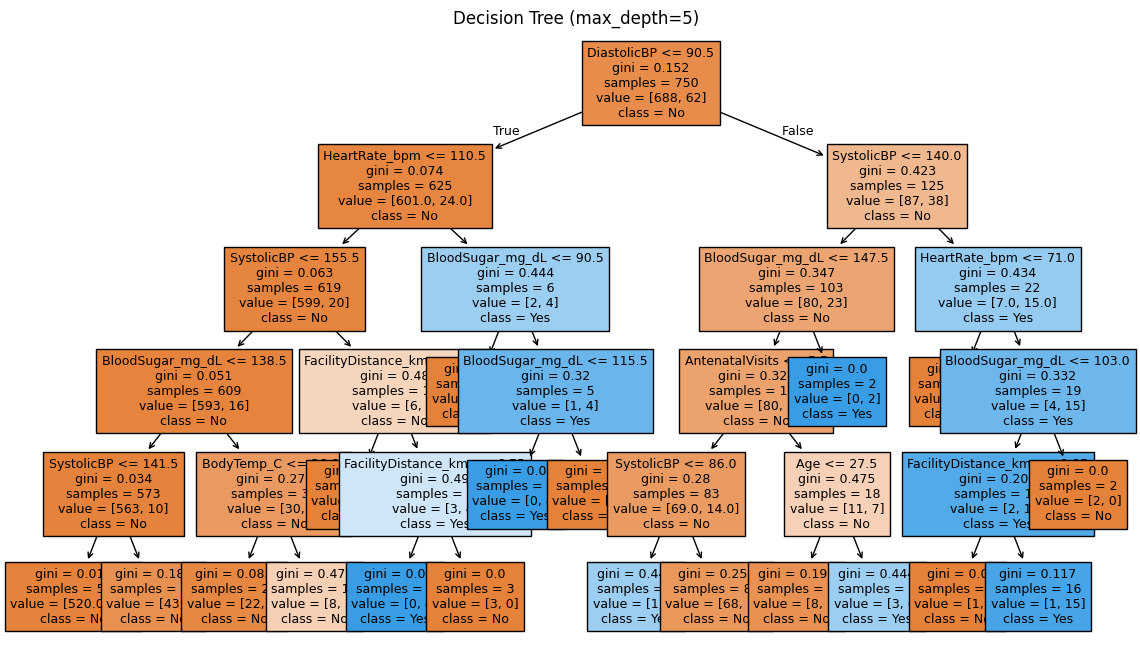

In [10]:
display(Markdown("## 🌳 Step 7: Feature Importance & Decision Tree Visualization"))

# Feature importances
importances = pd.Series(dt.feature_importances_, index=features).sort_values(ascending=False)
display(importances)

plt.figure(figsize=(14,8))
plot_tree(dt, feature_names=features, class_names=['No','Yes'], filled=True, fontsize=9)
plt.title("Decision Tree (max_depth=5)")
plt.show()


## 📉 Step 8: Confusion Matrices

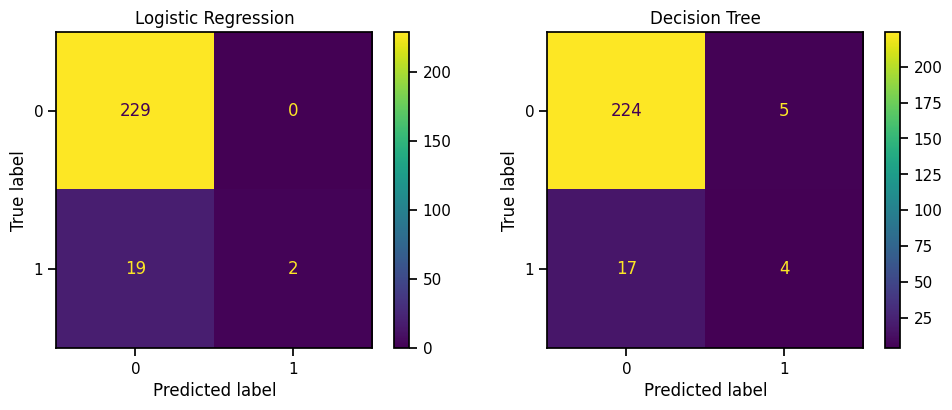

In [11]:
display(Markdown("## 📉 Step 8: Confusion Matrices"))

from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, ax=ax[0])
ax[0].set_title("Logistic Regression")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, ax=ax[1])
ax[1].set_title("Decision Tree")
plt.tight_layout()
plt.show()


In [12]:
display(Markdown("""
## 📜 Step 9: Chronicle Narrative — “The City That Ignored Its Data”

**Story Summary:**
In 2026, hospitals across regions collected vital signs and patient data—but the insights were never used.
Our analysis uncovered patterns showing that **high blood pressure and low antenatal visits** were strong predictors of maternal complications.

**Key Findings:**
- High systolic BP significantly increased risk.
- Low antenatal visits linked to higher complication rates.
- Regional inequality indicated lack of resource access.

**Moral:**
Data was never the problem; *ignorance of its voice* was.
With early-warning dashboards, countless complications could’ve been avoided.

**Call-to-Action:**
If you’d like to see the interactive dashboard from this analysis, comment 🌍 below.

#DataTravelerChronicles #HealthAnalytics #MaternalHealth #DataStorytelling
"""))



## 📜 Step 9: Chronicle Narrative — “The City That Ignored Its Data”

**Story Summary:**  
In 2026, hospitals across regions collected vital signs and patient data—but the insights were never used.  
Our analysis uncovered patterns showing that **high blood pressure and low antenatal visits** were strong predictors of maternal complications.

**Key Findings:**
- High systolic BP significantly increased risk.  
- Low antenatal visits linked to higher complication rates.  
- Regional inequality indicated lack of resource access.

**Moral:**  
Data was never the problem; *ignorance of its voice* was.  
With early-warning dashboards, countless complications could’ve been avoided.

**Call-to-Action:**  
If you’d like to see the interactive dashboard from this analysis, comment 🌍 below.  

#DataTravelerChronicles #HealthAnalytics #MaternalHealth #DataStorytelling
